In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms

In [2]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epochs=5
batch_size=4
learning_rate=0.001

In [4]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
train_dataset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
train_loader=torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [39]:
print(train_loader)

In [40]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [41]:
def imshow(img):
    img = img
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4])
(3, 36, 138)


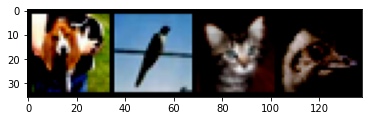

In [42]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels.shape)
# show images
imshow(torchvision.utils.make_grid(images))

In [30]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120,75)
        self.fc3=nn.Linear(75, 10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [31]:
model=ConvNet().to(device)

In [32]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
n_total_steps = len(train_loader)
print(n_total_steps)

12500


In [43]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        
        outputs=model(images)
        loss=criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)
        

Epoch [1/5], Step [2000/12500], Loss: 2.3183
Epoch [1/5], Step [4000/12500], Loss: 2.3048
Epoch [1/5], Step [6000/12500], Loss: 2.3077
Epoch [1/5], Step [8000/12500], Loss: 2.2321
Epoch [1/5], Step [10000/12500], Loss: 2.0449
Epoch [1/5], Step [12000/12500], Loss: 1.8226
Epoch [2/5], Step [2000/12500], Loss: 1.6926
Epoch [2/5], Step [4000/12500], Loss: 1.9589
Epoch [2/5], Step [6000/12500], Loss: 1.9496
Epoch [2/5], Step [8000/12500], Loss: 2.4594
Epoch [2/5], Step [10000/12500], Loss: 2.0287
Epoch [2/5], Step [12000/12500], Loss: 1.2936
Epoch [3/5], Step [2000/12500], Loss: 1.9999
Epoch [3/5], Step [4000/12500], Loss: 1.7389
Epoch [3/5], Step [6000/12500], Loss: 1.9467
Epoch [3/5], Step [8000/12500], Loss: 1.3588
Epoch [3/5], Step [10000/12500], Loss: 2.2722
Epoch [3/5], Step [12000/12500], Loss: 1.7760
Epoch [4/5], Step [2000/12500], Loss: 1.5352
Epoch [4/5], Step [4000/12500], Loss: 2.4143
Epoch [4/5], Step [6000/12500], Loss: 2.1913
Epoch [4/5], Step [8000/12500], Loss: 1.3519
Epoc

In [45]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
    
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 48.74 %
Accuracy of plane: 43.0 %
Accuracy of car: 60.3 %
Accuracy of bird: 35.3 %
Accuracy of cat: 31.1 %
Accuracy of deer: 44.0 %
Accuracy of dog: 41.9 %
Accuracy of frog: 51.4 %
Accuracy of horse: 56.6 %
Accuracy of ship: 75.4 %
Accuracy of truck: 48.4 %
